In [108]:
from sklearn.model_selection import cross_val_score
import numpy as np
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.tree import DecisionTreeClassifier
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

In [109]:
np.random.seed(2)
random.seed(2)
data = pd.read_csv("cancer.csv",header=0)
# here header 0 means the 0 th row is our coloumn name
# have a look at the data
data.head(6)# as u can see our data have imported and having 33 columns
# head is used for to see top 5 by default I used 2 so it will print 6 rows
# now lets look at the type of data we have. We can use
#data.info()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [110]:
# now we can drop this column Unnamed: 32
data.drop("Unnamed: 32",axis=1,inplace=True) # in this process this will change in our data itself
# if you want to save your old data then you can use below code
# data1=data.drop("Unnamed:32",axis=1)
# here axis 1 means we are droping the column
# here you can check the column has been droped
data.columns # this gives the column name which are persent in our data no Unnamed: 32 is not now there

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [111]:
# like this we also don't want the Id column for our analysis
data.drop("id",axis=1,inplace=True)
# As I said above the data can be divided into three parts.lets divide the features according to their category
# now as you know our diagnosis column is a object type so we can map it to integer value
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [112]:
data.describe() # this will describe the all statistical function of our data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


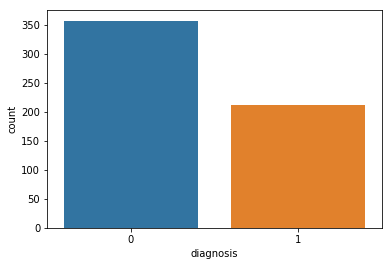

In [113]:
# lets get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")
plt.show()

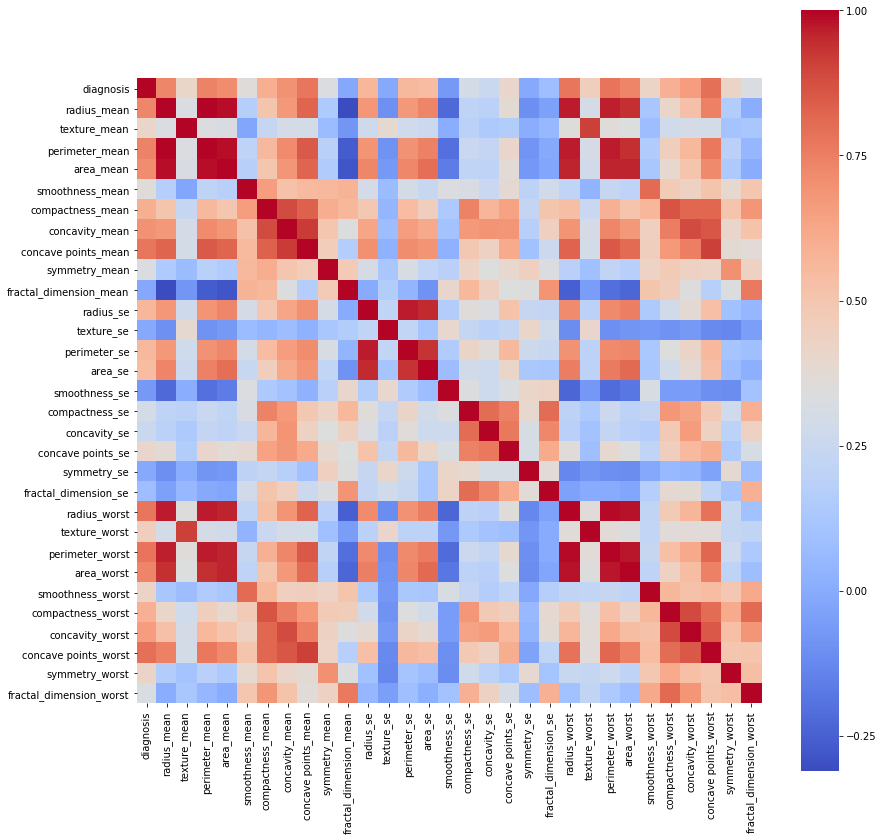

In [114]:
corr = data.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [115]:
#Based on corrplot let's select some features for the model ( decision is made in order to remove collinearity)
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [116]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [117]:
train_X = train[prediction_var]# taking the training data input
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [118]:
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.8888888888888888


/Users/shubhradeep/PycharmProjects/ReLearn/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [119]:
clf = DecisionTreeClassifier(random_state=0)
#cross_val_score(clf, train_X, train_y, cv=10)
clf.fit(train_X,train_y, sample_weight=None, check_input=True, X_idx_sorted=None)
#clf.get_params(deep=True)
clf.predict(test_X, check_input=True)
#clf.predict_log_proba(test_X)
#clf.predict(test_X,check_input=True)
print(clf.score(test_X,test_y, sample_weight=None))

0.9122807017543859


In [120]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
#prediction=model.predict(test_X)# predict for the test data
print(model.score(test_X,test_y, sample_weight=None))

0.9122807017543859
